# Lab 4: Merger Arbitrage Strategy


## Case Study: Elon Musk's Acquisition of Twitter (2022)

---

## Learning Objectives

By the end of this lab, you will be able to:
1. Understand the mechanics of merger arbitrage strategies
2. Calculate the arbitrage spread and annualized returns
3. Analyze deal risk and uncertainty through stock price movements
4. Implement a merger arbitrage trading strategy
5. Evaluate strategy performance and risk metrics

---

## Background: The Twitter Acquisition

In 2022, Elon Musk made headlines with his acquisition of Twitter. Here's the timeline:

- **April 14, 2022**: Elon Musk offers to buy Twitter at **$54.20 per share** (all-cash offer)
- **April 25, 2022**: Twitter's board accepts the $44 billion offer
- **May 13, 2022**: Musk tweets deal is "on hold" due to bot concerns (deal uncertainty period begins)
- **October 4, 2022**: Musk revives deal at original price
- **October 28, 2022**: Deal closes, Twitter delisted

### Merger Arbitrage Opportunity

When a company announces it will be acquired:
- The **target stock** (Twitter) typically jumps toward the offer price
- However, it usually trades **below** the offer price, creating a "spread"
- This spread represents the **deal risk** (uncertainty that deal might not close)
- Arbitrageurs profit by buying the stock and holding until deal closes

**Key Formula:**
$$\text{Arbitrage Spread} = \text{Offer Price} - \text{Current Stock Price}$$

$$\text{Annualized Return} = \left(\frac{\text{Offer Price}}{\text{Current Price}} - 1\right) \times \frac{365}{\text{Days to Close}}$$

In [97]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

---
## Part 1: Load and Explore the Data

**Task 1.1**: Load the Twitter stock data from `TWTR.csv` and display the first and last 10 rows.

In [98]:
# Task 1.1: Load Twitter stock data
twtr = pd.read_csv("./TWTR.csv", index_col = "Date", parse_dates = True)
print("============================================================")
print("Twitter Stock Data - First 10 rows:")
print(twtr.head(10))
print("============================================================")
print("Twitter Stock Data - Last 10 rows:")
print(twtr.tail(10))
print("============================================================")
print(f"Total trading days: {len(twtr)}")
print(f"Date range: {twtr.index[0]} to {twtr.index[-1]}")
print("============================================================")

Twitter Stock Data - First 10 rows:
            Close  Open  High   Low    Volume
Date                                         
2022-01-03  41.75 41.54 41.78 41.52   7008677
2022-01-04  38.04 38.22 38.42 37.90  11941722
2022-01-05  39.01 38.96 39.07 38.89  19062296
2022-01-06  40.24 40.47 40.72 39.78  18793153
2022-01-07  39.65 39.46 39.82 39.22  27159972
2022-01-10  37.08 36.40 37.21 36.22  19792904
2022-01-11  39.10 38.86 39.14 38.72  24557028
2022-01-12  37.93 37.87 38.08 37.52  21261117
2022-01-13  39.05 38.91 39.13 38.77  24302165
2022-01-14  40.85 41.23 41.52 40.83  22584979
Twitter Stock Data - Last 10 rows:
            Close  Open  High   Low    Volume
Date                                         
2022-10-17  51.93 51.78 52.29 51.42  20082327
2022-10-18  50.96 50.92 51.32 50.80  14718858
2022-10-19  52.06 52.32 52.54 51.72  10025826
2022-10-20  51.02 51.41 51.76 51.02  12823384
2022-10-21  51.15 51.31 51.33 51.04   9902892
2022-10-24  53.35 53.75 53.95 53.25  18096291
2022-10-2

**Task 1.2**: Calculate basic statistics for the Twitter stock price throughout 2022.

In [99]:
# Task 1.2: Calculate basic statistics
close_mean = twtr["Close"].mean()
close_median = twtr["Close"].median()
close_min = twtr["Close"].min()
close_max = twtr["Close"].max()
close_std = twtr["Close"].std()
price_start = twtr["Close"].iloc[0]
price_end = twtr["Close"].iloc[-1]
return_total = (price_end - price_start) / price_start

print("============================================================")
print("Twitter Stock Price Statistics (2022):")
print("------------------------------------------------------------")
print(f"Mean Close Price: ${close_mean:.2f}")
print(f"Median Close Price: ${close_median:.2f}")
print(f"Min Close Price: ${close_min:.2f}")
print(f"Max Close Price: ${close_max:.2f}")
print(f"Standard Deviation: ${close_std:.2f}\n")
print(f"Price at start of year (Jan 3): ${price_start:.2f}")
print(f"Price at end of year (Oct 28): ${price_end:.2f}")
print(f"Total return (if held entire period): {(return_total * 100):.2f}%")
print("============================================================")

Twitter Stock Price Statistics (2022):
------------------------------------------------------------
Mean Close Price: $41.22
Median Close Price: $39.92
Min Close Price: $34.69
Max Close Price: $54.25
Standard Deviation: $4.56

Price at start of year (Jan 3): $41.75
Price at end of year (Oct 28): $53.70
Total return (if held entire period): 28.64%


**Task 1.3**: Plot the Twitter stock price for the entire period. Mark key dates with vertical lines:
- Announcement (April 14, 2022)
- Deal Accepted (April 25, 2022)
- Deal on Hold (May 13, 2022)
- Deal Revived (October 4, 2022)
- Deal Closed (October 28, 2022)

Also plot a horizontal line at the offer price ($54.20).

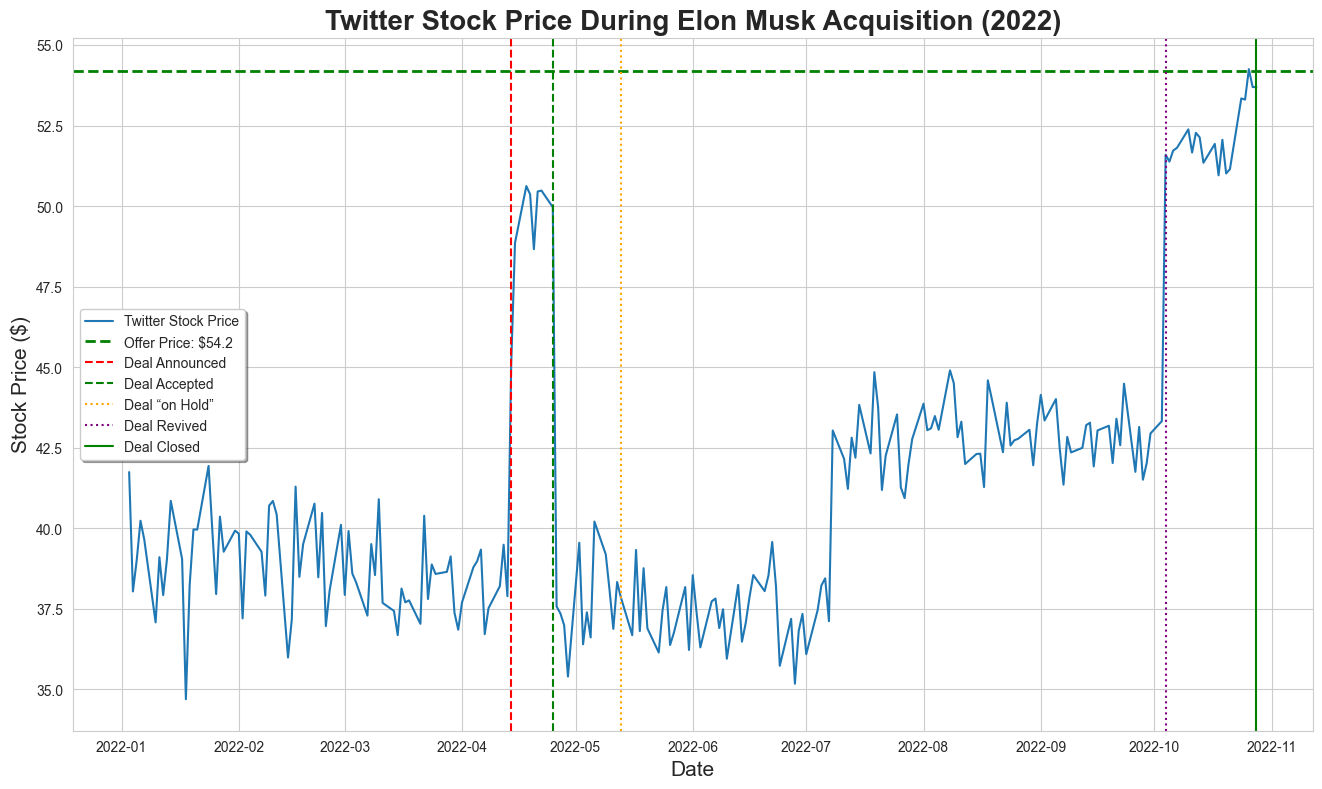

In [127]:
# Task 1.3: Plot Twitter stock price with key events

deal_announced = "2024-04-14"
deal_accepted = "2024-04-25"
deal_on_hold = "2024-05-13"
deal_revived = "2024-10-04"
deal_closed = "2024-10-28"

price_offer = 54.2
key_dates = {
    "2022-04-14": ("Deal Announced", "red", "--"),
    "2022-04-25": ("Deal Accepted", "green", "--"),
    "2022-05-13": ("Deal “on Hold”", "orange", ":"),
    "2022-10-04": ("Deal Revived", "purple", ":"),
    "2022-10-28": ("Deal Closed", "green", "-")
}

def twitter_plot_price_with_key_events_2022(
    price_offer: float,
    key_dates: dict = None
) -> None:
    fig = plt.figure(figsize = (16, 9))
    ax = fig.add_subplot()

    ax.plot(twtr.index, twtr["Close"], label = "Twitter Stock Price")

    ax.axhline(y = price_offer, color = "g", linestyle = "--", linewidth = 2, label = f"Offer Price: ${price_offer}")
    
    for date, (statement, color, lstyle) in key_dates.items():
        date = datetime.strptime(date, "%Y-%m-%d")
        ax.axvline(x = date, color = color, linestyle = lstyle, label = f"{statement}")

    plt.grid(True)
    plt.legend(loc = "center left", fancybox = True, shadow = True)
    plt.title("Twitter Stock Price During Elon Musk Acquisition (2022)", fontsize = 20, fontweight = "bold")
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel(f"Stock Price ($)", fontsize = 15)
    plt.show()

twitter_plot_price_with_key_events_2022(price_offer = price_offer, key_dates = key_dates)

---
## Part 2: Analyze the Arbitrage Spread

**Task 2.1**: Calculate the arbitrage spread for each day after the announcement (April 14, 2022).

The spread is: **Offer Price ($54.20) - Current Stock Price**

In [101]:
# Task 2.1: Calculate arbitrage spread
df = twtr.copy()
price_offer = np.array(54.20)

df["Offer_Price"] = price_offer
df["Spread"] = df["Offer_Price"] - df["Close"]
df["Spread_Percent"] = df["Spread"] / df["Close"] * 100

df = df[["Close", "Offer_Price", "Spread", "Spread_Percent"]]

spread_avg = df["Spread"].mean()
spread_max = df["Spread"].max()
spread_min = df["Spread"].min()
spread_percent_avg = df["Spread_Percent"].mean()
spread_percent_max = df["Spread_Percent"].max()
spread_percent_min = df["Spread_Percent"].min()
spread_announce = df["Spread"].loc["2022-04-14"]
spread_last = df["Spread"].iloc[-1]

print("=======================================================================")
print("Arbitrage Spread Analysis:")
print("-----------------------------------------------------------------------")
print(f"Average spread: ${spread_avg:.2f} ({(spread_percent_avg):.2f})%")
print(f"Maximum spread: ${spread_max:.2f} ({(spread_percent_max):.2f})%")
print(f"Minimum spread: ${spread_min:.2f} ({(spread_percent_min):.2f})%\n")
print(f"Spread on announcement day: ${spread_announce:.2f}")
print(f"Spread on last day: ${spread_last:.2f}")
print("=======================================================================")
print("First 10 days after announcement:")
print("-----------------------------------------------------------------------")
print(df[df.index >= "2022-04-14"].head(10))
print("=======================================================================")

Arbitrage Spread Analysis:
-----------------------------------------------------------------------
Average spread: $12.98 (32.94)%
Maximum spread: $19.51 (56.22)%
Minimum spread: $-0.05 (-0.10)%

Spread on announcement day: $9.12
Spread on last day: $0.50
First 10 days after announcement:
-----------------------------------------------------------------------
            Close  Offer_Price  Spread  Spread_Percent
Date                                                  
2022-04-14  45.08        54.20    9.12           20.23
2022-04-15  48.86        54.20    5.34           10.93
2022-04-18  50.63        54.20    3.57            7.06
2022-04-19  50.37        54.20    3.83            7.61
2022-04-20  48.67        54.20    5.53           11.37
2022-04-21  50.46        54.20    3.74            7.42
2022-04-22  50.49        54.20    3.71            7.36
2022-04-25  49.97        54.20    4.23            8.47
2022-04-26  37.57        54.20   16.63           44.25
2022-04-27  37.36        54.20   

**Task 2.2**: Plot the arbitrage spread over time. This shows how deal uncertainty evolved.

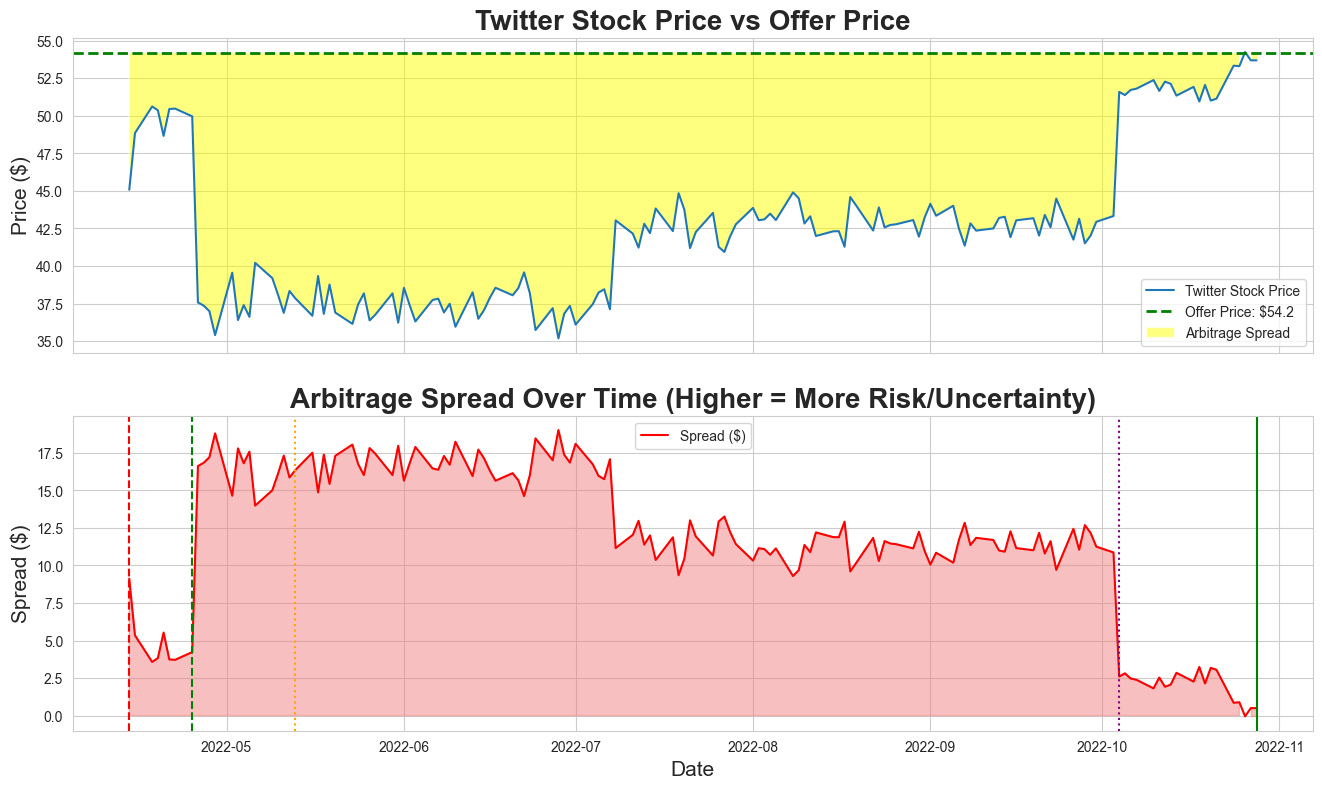

In [132]:
# Task 2.2: Plot arbitrage spread

df = df[df.index >= "2022-04-14"]

def arbitrage_spread_plot(
    df, 
    key_dates: dict,
    price_offer: float
) -> None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 9), sharex = True)

    ax1.plot(df.index, df["Close"], label = "Twitter Stock Price")
    ax1.axhline(y = price_offer, color = "g", linestyle = "--", linewidth = 2, label = f"Offer Price: ${price_offer}")
    ax1.fill_between(
        df.index, 
        df["Close"], 
        price_offer, 
        where = (df["Close"] < price_offer), 
        facecolor = "yellow", 
        alpha = 0.5,
        label = "Arbitrage Spread"
    )
    ax1.set_title("Twitter Stock Price vs Offer Price", fontsize = 20, fontweight = "bold")
    ax1.set_ylabel("Price ($)", fontsize = 15)
    ax1.legend(loc = "lower right")

    ax2.plot(df.index, df["Spread"], color = "red", label = "Spread ($)")
    for date, (_, color, lstyle) in key_dates.items():
        date = datetime.strptime(date, "%Y-%m-%d")
        ax2.axvline(x = date, color = color, linestyle = lstyle)
    ax2.fill_between(
        df.index, 
        df["Spread"], 
        0, 
        where = (df["Spread"] >= 0), 
        color = "lightcoral", 
        alpha = 0.5
    )
    ax2.set_title("Arbitrage Spread Over Time (Higher = More Risk/Uncertainty)", fontsize = 20, fontweight = "bold")
    ax2.set_xlabel("Date", fontsize = 15)
    ax2.set_ylabel("Spread ($)", fontsize = 15)
    ax2.legend(loc = "upper center")

arbitrage_spread_plot(df, key_dates = key_dates, price_offer = price_offer)

**Task 2.3**: Calculate the annualized return potential for each day, assuming the deal closes on October 28, 2022.

Formula: $\text{Annualized Return} = \left(\frac{\text{Offer Price}}{\text{Current Price}} - 1\right) \times \frac{365}{\text{Days to Close}}$

In [ ]:
# Task 2.3: Calculate annualized returns


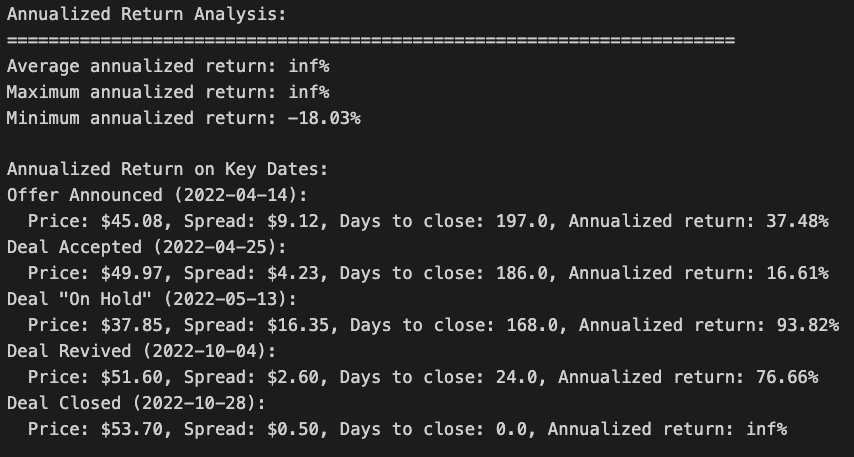

**Task 2.4**: Create a scatter plot showing the relationship between days to close and annualized return.

In [ ]:
# Task 2.4: Scatter plot of days to close vs annualized return
#CODE HERE

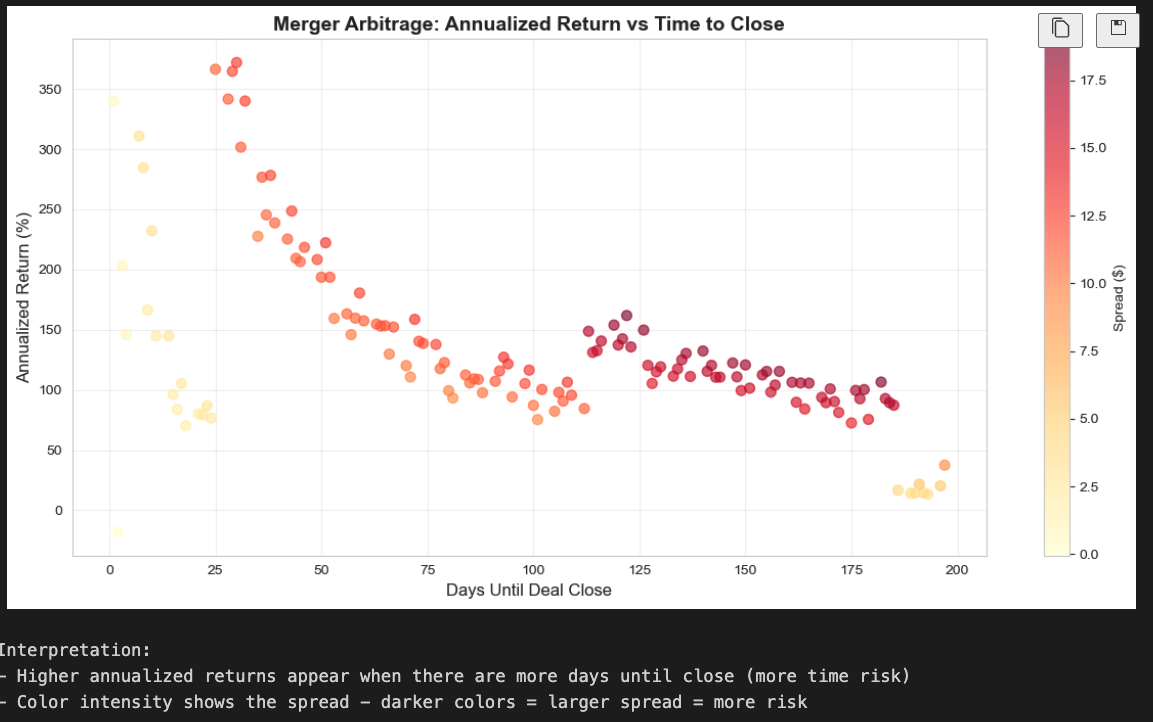

---
## Part 3: Implement the Merger Arbitrage Strategy

**Task 3.1**: Implement a simple merger arbitrage strategy:
- **Enter**: Buy Twitter stock the day after the deal is announced (April 15, 2022)
- **Exit**: Sell on the day the deal closes (October 28, 2022) at the offer price

Calculate the total return and holding period.

In [ ]:
# Task 3.1: Simple buy-and-hold merger arbitrage
#CODE HERE

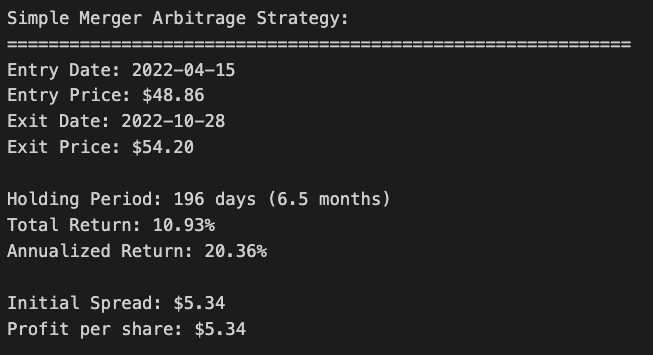

**Task 3.2**: Calculate what would have happened if you invested $100,000 in this strategy.

Also calculate the return of a buy-and-hold strategy starting January 3, 2022.

In [ ]:
# Task 3.2: Calculate profit on $100,000 investment
#CODE HERE

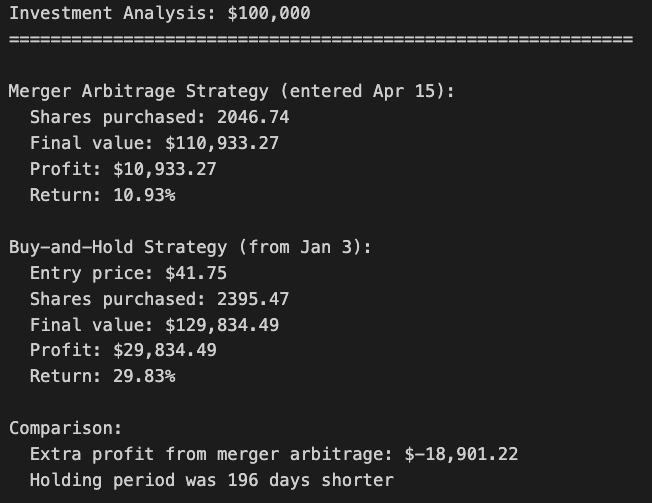

**Task 3.3**: Analyze the drawdown during the holding period. What was the maximum loss if you had panic-sold at the worst time?

In [ ]:
# Task 3.3: Calculate drawdown (unrealized loss) during holding period
#CODE HERE

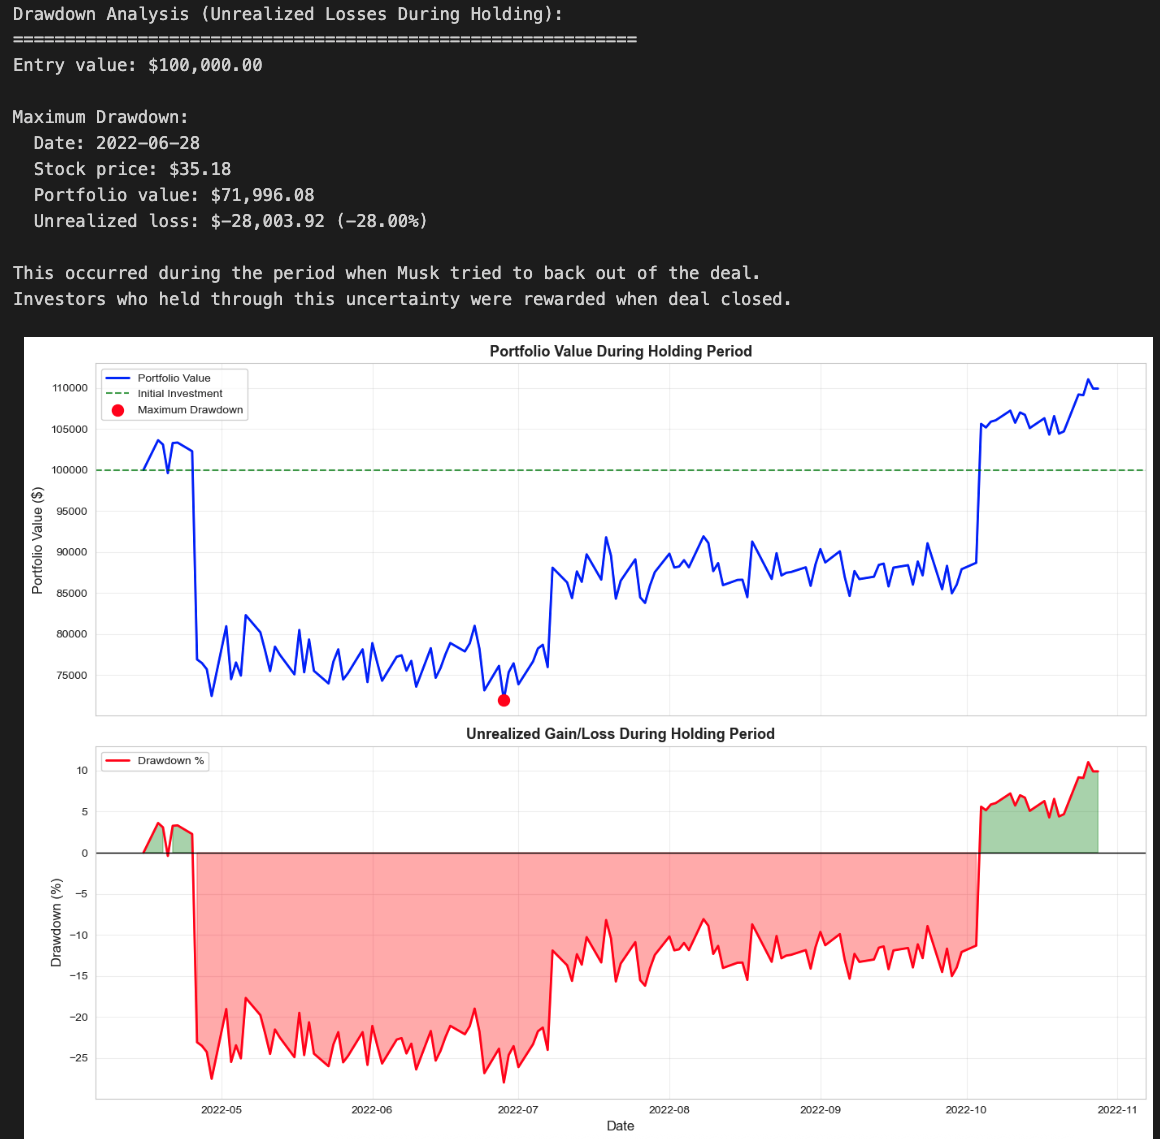

---
## Part 4: Risk Analysis

**Task 4.1**: Calculate daily returns and volatility during the holding period.

In [ ]:
# Task 4.1: Calculate volatility
#CODE HERE

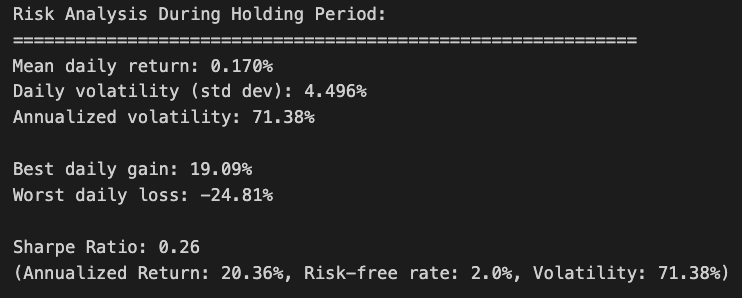

**Task 4.2**: Create a histogram of daily returns to visualize the distribution.

In [ ]:
# Task 4.2: Histogram of daily returns
#CODE HERE

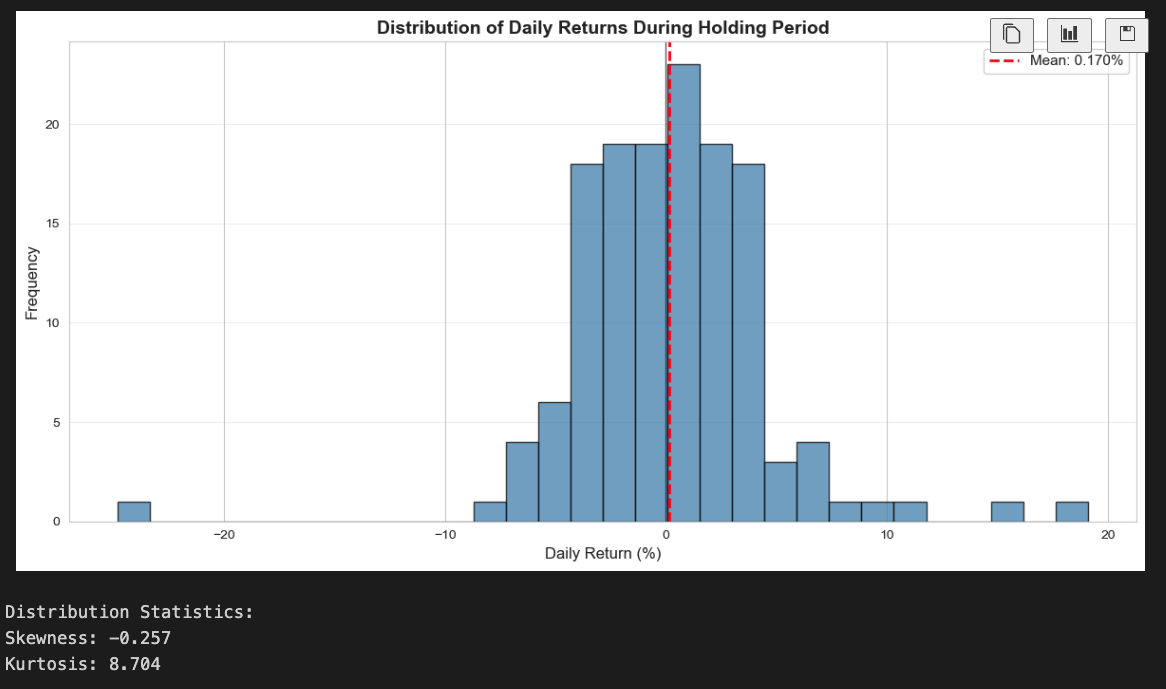

**Task 4.3**: Identify the 5 days with the largest price movements and research what news might have caused them.

In [ ]:
# Task 4.3: Identify largest price movements
#CODE HERE

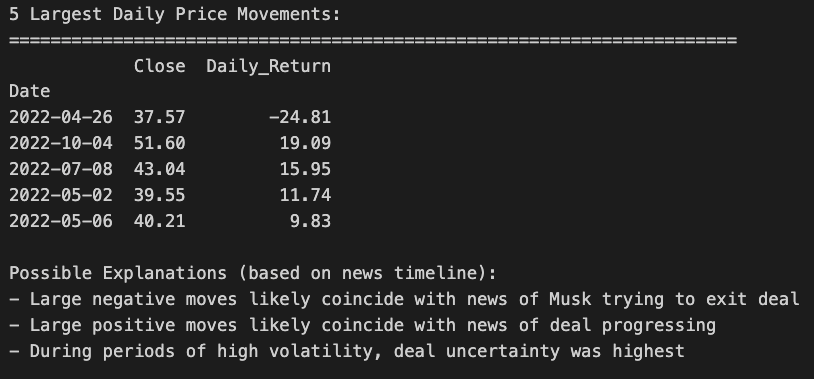

---
## Summary and Key Takeaways

### What We Learned:

1. **Merger Arbitrage Mechanics**: 
   - Target stock trades below offer price due to deal risk
   - The spread represents compensation for uncertainty
   - Profit realized when deal closes

2. **Risk Factors**:
   - Deal may not close (regulatory, financing, buyer backs out)
   - Time risk (longer timeframe = more uncertainty)
   - Market risk (stock can decline below entry price)

3. **Return Characteristics**:
   - Returns are typically modest but consistent (if deal closes)
   - Annualized returns depend on holding period
   - Risk-adjusted returns can be attractive

4. **Real-World Application**:
   - The Twitter deal had unusual uncertainty (Musk's on-off commitment)
   - This created wider spreads = higher potential returns
   - Investors who held through uncertainty were rewarded

### Strategy Suitability:

Merger arbitrage is suitable for:
- Risk-aware investors who can withstand volatility
- Those who can analyze deal probability
- Investors seeking diversification (uncorrelated with market)

**Not suitable for:**
- Risk-averse investors
- Those who cannot tolerate drawdowns
- Short-term traders (requires holding to deal close)

In [ ]:
# Final summary statistics
print("="*70)
print("FINAL SUMMARY: Twitter Merger Arbitrage (2022)")
print("="*70)
print(f"\nStrategy: Buy Twitter stock after announcement, hold until deal close")
print(f"Entry: {entry_date} at ${entry_price:.2f}")
print(f"Exit: {exit_date} at ${exit_price:.2f}")
print(f"\nResults:")
print(f"  Holding period: {holding_days} days")
print(f"  Total return: {total_return:.2f}%")
print(f"  Annualized return: {annualized_return:.2f}%")
print(f"  Maximum drawdown: {max_dd_pct:.2f}%")
print(f"  Volatility: {annualized_volatility:.2f}%")
print(f"  Sharpe ratio: {sharpe_ratio:.2f}")
print(f"\n  $100,000 investment → ${final_value:,.2f} (profit: ${profit:,.2f})")
print("="*70)